## Compare ChebyKAN's ability in function interpolation with MLP with proper MLP baseline

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time
from ChebyKANLayer import ChebyKANLayer

In [ ]:
# Define target function
def target_function(x):
    y = np.zeros_like(x)
    mask1 = x < 0.5
    y[mask1] = np.sin(20 * np.pi * x[mask1]) + x[mask1] ** 2
    mask2 = (0.5 <= x) & (x < 1.5)
    y[mask2] = 0.5 * x[mask2] * np.exp(-x[mask2]) + np.abs(np.sin(5 * np.pi * x[mask2]))
    mask3 = x >= 1.5
    y[mask3] = np.log(x[mask3] - 1) / np.log(2) - np.cos(2 * np.pi * x[mask3])

    return y

In [ ]:
# Define MLP and ChebyKAN
class SimpleMLP(nn.Module):
    def __init__(self, K=128):
        super(SimpleMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, K),
            nn.Tanh(),
            nn.Linear(K, 1)
        )

    def forward(self, x):
        # Just centralize the input
        return self.layers(x-1)


class ChebyKAN(nn.Module):
    def __init__(self):
        super(ChebyKAN, self).__init__()
        self.chebykan1 = ChebyKANLayer(1, 8, 8)
        self.chebykan2 = ChebyKANLayer(8, 1, 8)

    def forward(self, x):
        x = self.chebykan1(x)
        x = self.chebykan2(x)
        return x

Epoch 1/200000, MLP Loss: 0.8184
Epoch 1001/200000, MLP Loss: 0.1857
Epoch 2001/200000, MLP Loss: 0.1853
Epoch 3001/200000, MLP Loss: 0.1845
Epoch 4001/200000, MLP Loss: 0.1835
Epoch 5001/200000, MLP Loss: 0.1630
Epoch 6001/200000, MLP Loss: 0.1578
Epoch 7001/200000, MLP Loss: 0.1557
Epoch 8001/200000, MLP Loss: 0.1504
Epoch 9001/200000, MLP Loss: 0.1487
Epoch 10001/200000, MLP Loss: 0.1472
Epoch 11001/200000, MLP Loss: 0.1458
Epoch 12001/200000, MLP Loss: 0.1442
Epoch 13001/200000, MLP Loss: 0.1422
Epoch 14001/200000, MLP Loss: 0.1416
Epoch 15001/200000, MLP Loss: 0.1362
Epoch 16001/200000, MLP Loss: 0.1335
Epoch 17001/200000, MLP Loss: 0.1303
Epoch 18001/200000, MLP Loss: 0.1272
Epoch 19001/200000, MLP Loss: 0.1253
Epoch 20001/200000, MLP Loss: 0.1228
Epoch 21001/200000, MLP Loss: 0.1215
Epoch 22001/200000, MLP Loss: 0.1197
Epoch 23001/200000, MLP Loss: 0.1177
Epoch 24001/200000, MLP Loss: 0.1153
Epoch 25001/200000, MLP Loss: 0.1121
Epoch 26001/200000, MLP Loss: 0.1091
Epoch 27001/20

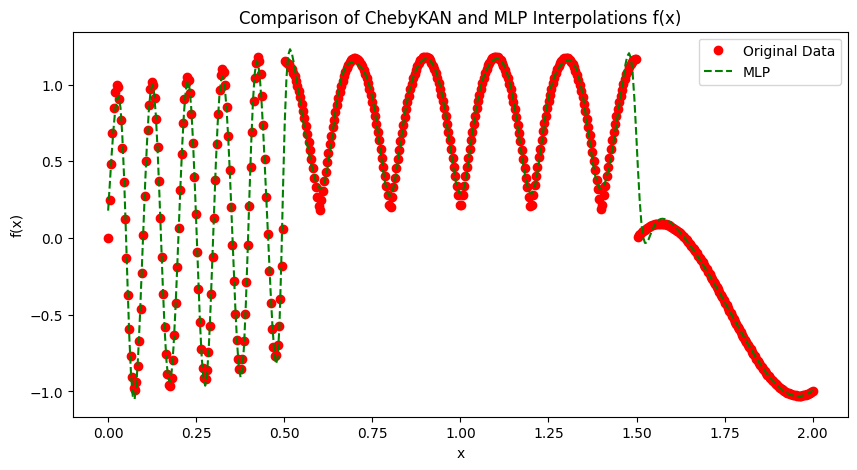

In [ ]:
# Generate sample data
x_train = torch.linspace(0, 2, steps=500).unsqueeze(1)
y_train = torch.tensor(target_function(x_train))

# Instantiate models
#cheby_model = ChebyKAN()
mlp_model = SimpleMLP()

# Define loss function and optimizer
criterion = nn.MSELoss()
#optimizer_cheby = torch.optim.Adam(cheby_model.parameters(), lr=0.01)
optimizer_mlp = torch.optim.Adam(mlp_model.parameters(), lr=0.03)
epochs = 200000
sched = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_mlp, epochs)

# Train the models

for epoch in range(epochs):
    #optimizer_cheby.zero_grad()
    #outputs_cheby = cheby_model(x_train)
    #loss_cheby = criterion(outputs_cheby, y_train)
    #loss_cheby.backward()
    #optimizer_cheby.step()

    optimizer_mlp.zero_grad()
    outputs_mlp = mlp_model(x_train)
    loss_mlp = criterion(outputs_mlp, y_train)
    loss_mlp.backward()
    optimizer_mlp.step()
    sched.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, MLP Loss: {loss_mlp.item():.4f}')

# Test the models
x_test = torch.linspace(0, 2, steps=400).unsqueeze(1)
#y_pred_cheby = cheby_model(x_test).detach()
y_pred_mlp = mlp_model(x_test).detach()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original Data')
#plt.plot(x_test.numpy(), y_pred_cheby.numpy(), 'b-', label='ChebyKAN')
plt.plot(x_test.numpy(), y_pred_mlp.numpy(), 'g--', label='MLP')
plt.title('Comparison of ChebyKAN and MLP Interpolations f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()